In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary_Data (1).csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
df.shape

(30, 2)

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Text(0, 0.5, 'Salary')

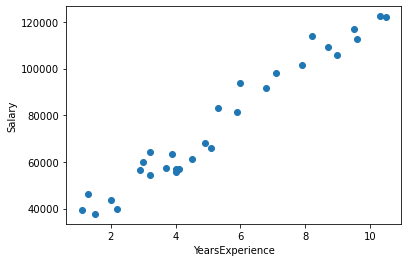

In [11]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

Text(0.5, 1.0, "Histogram of 'Salary'")

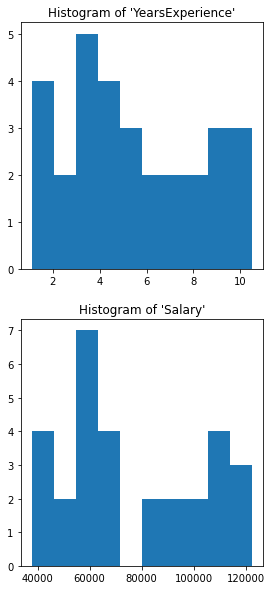

In [12]:
# Histogram
# We can use either plt.hist or sns.histplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df['YearsExperience'], density=False)
plt.title("Histogram of 'YearsExperience'")
plt.subplot(2,4,5)
plt.hist(df['Salary'], density=False)
plt.title("Histogram of 'Salary'")

Text(0.5, 1.0, "Density distribution of 'Salary'")

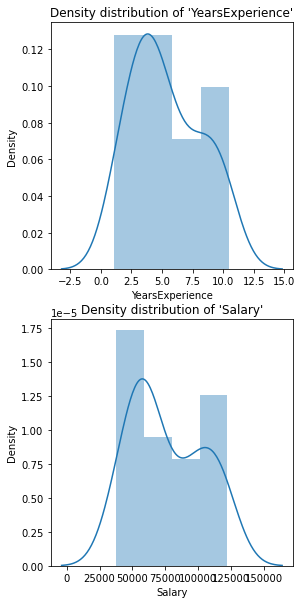

In [13]:
# Density plot
plt.figure(figsize=(20, 10))
plt.subplot(2,4,2)
sns.distplot(df['YearsExperience'], kde=True)
plt.title("Density distribution of 'YearsExperience'")
plt.subplot(2,4,6)
sns.distplot(df['Salary'], kde=True)
plt.title("Density distribution of 'Salary'")

Text(0.5, 1.0, "Violin plot of 'Salary'")

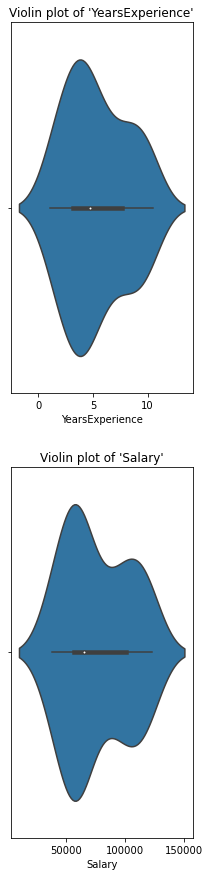

In [14]:
# boxplot or violin plot
# A violin plot is a method of plotting numeric data. It is similar to a box plot, 
# with the addition of a rotated kernel density plot on each side
plt.figure(figsize=(15, 15))
plt.subplot(2,4,3)
# plt.boxplot(df['YearsExperience'])
sns.violinplot(df['YearsExperience'])
# plt.title("Boxlpot of 'YearsExperience'")
plt.title("Violin plot of 'YearsExperience'")
plt.subplot(2,4,7)
# plt.boxplot(df['Salary'])
sns.violinplot(df['Salary'])
# plt.title("Boxlpot of 'Salary'")
plt.title("Violin plot of 'Salary'")

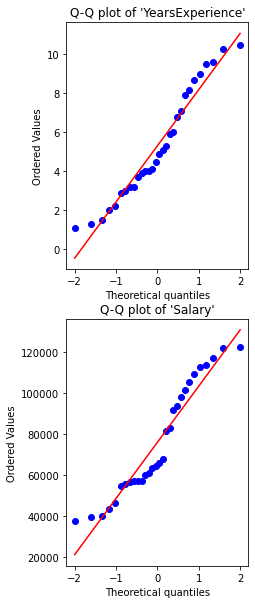

In [15]:
# Normal Q-Q plot
from scipy.stats import probplot
plt.figure(figsize=(15, 10))
plt.subplot(2,4,4)
probplot(df['YearsExperience'], plot=plt)
plt.title("Q-Q plot of 'YearsExperience'")
plt.subplot(2,4,8)
probplot(df['Salary'], plot=plt)
plt.title("Q-Q plot of 'Salary'")
plt.show()

In [16]:
from scipy import stats
# Def a function to run Shapiro test

# Defining our Null, Alternate Hypothesis
Ho = 'Data is Normal'
Ha = 'Data is not Normal'
# Defining a significance value
alpha = 0.05
def normality_check(df):
    for columnName, columnData in df.iteritems():
        print("Shapiro test for {columnName}".format(columnName=columnName))
        res = stats.shapiro(columnData)
#         print(res)
        pValue = round(res[1], 2)
        
        # Writing condition
        if pValue > alpha:
            print("pvalue = {pValue} > {alpha}. We fail to reject Null Hypothesis. {Ho}".format(pValue=pValue, alpha=alpha, Ho=Ho))
        else:
            print("pvalue = {pValue} <= {alpha}. We reject Null Hypothesis. {Ha}".format(pValue=pValue, alpha=alpha, Ha=Ha))
        
        
# Drive code
normality_check(df)

Shapiro test for YearsExperience
pvalue = 0.1 > 0.05. We fail to reject Null Hypothesis. Data is Normal
Shapiro test for Salary
pvalue = 0.02 <= 0.05. We reject Null Hypothesis. Data is not Normal


Text(0.5, 1.0, 'Line Plot')

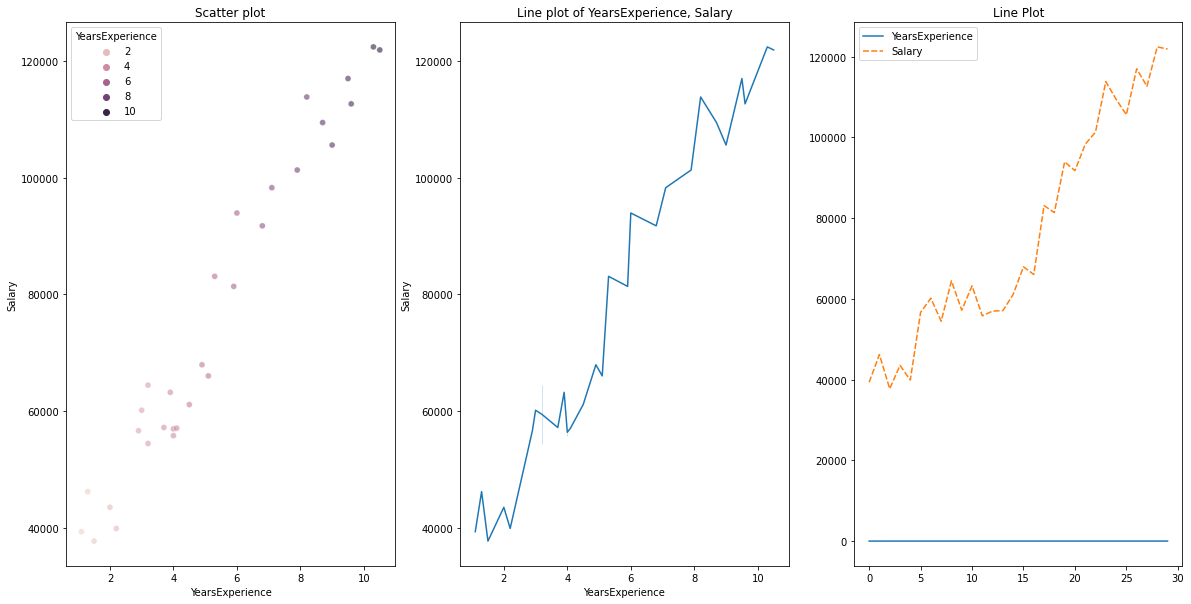

In [17]:
# Scatterplot & Line plots
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x="YearsExperience", y="Salary", hue="YearsExperience", alpha=0.6)
plt.title("Scatter plot")
plt.subplot(1,3,2)
sns.lineplot(data=df, x="YearsExperience", y="Salary")
plt.title("Line plot of YearsExperience, Salary")
plt.subplot(1,3,3)
sns.lineplot(data=df)
plt.title('Line Plot')

Text(0.5, 1.0, 'Joint plot using sns')

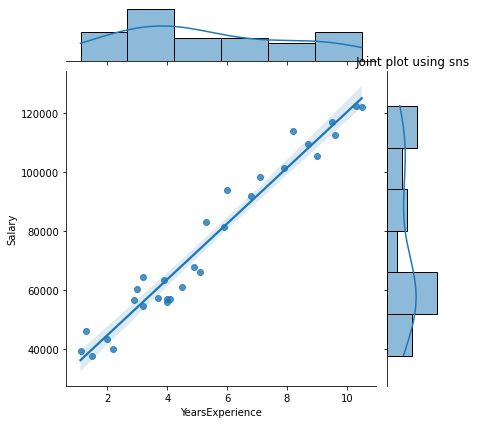

In [18]:
# Joint plot
sns.jointplot(x = "YearsExperience", y = "Salary", kind = "reg", data = df)
plt.title("Joint plot using sns")
# kind can be hex, kde, scatter, reg, hist. When kind='reg' it shows the best fit lin

Correlation: n                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


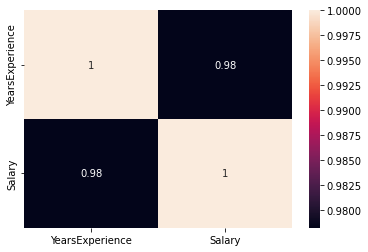

In [19]:
print("Correlation: "+ 'n', df.corr()) # 0.978 which is high positive correlation
# Draw a heatmap for correlation matrix
plt.subplot(1,1,1)
sns.heatmap(df.corr(), annot=True);

In [20]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [21]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [22]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
x_test

,YearsExperience
1,1.3
0,1.1
14,4.5
9,3.7
21,7.1
19,6.0


In [28]:
y_test

1     46205.0
0     39343.0
14    61111.0
9     57189.0
21    98273.0
19    93940.0
Name: Salary, dtype: float64

In [29]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

array([36833.63210301])

In [30]:
lr.predict(x_test.iloc[1].values.reshape(1,1))

array([34919.71472592])

In [31]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

array([67456.3101364])

Text(0, 0.5, 'Salary')

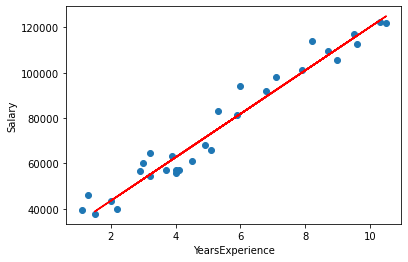

In [32]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [33]:
m =lr.coef_

In [34]:
b = lr.intercept_

In [35]:
# y = mx + b
m * 1.1 + b

array([34919.71472592])